In [62]:
# import mel spectra
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

load feature_extractor_mother
load feature_extractor_mel_spectra


In [49]:
import pandas as pd

import os
import sys
import glob

def get_files(base_folder,SNR,machine,ID):
    
    fn = dict()
    fa = dict()
    
    for idx in ID:
        
        fn[idx] = sorted(glob.glob(os.path.abspath( "{base}/{SNR}/{machine}/id_{ID}/{n}/*.{ext}".format(
        base=base_folder+'dataset',SNR=SNR,machine=machine,ID=idx, n='normal',ext='wav' ))))
    
        fa[idx] = sorted(glob.glob(os.path.abspath( "{base}/{SNR}/{machine}/id_{ID}/{n}/*.{ext}".format(
        base=base_folder+'dataset',SNR=SNR,machine=machine,ID=idx, n='abnormal',ext='wav' ))))
    
    return fn, fa

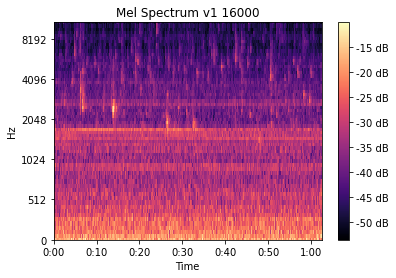

16000
v1


(124928,)

In [39]:
# example to tune paramters
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
fe_mel = feature_extractor_mel(BASE_FOLDER,'v1')
fe_mel.set_hyperparamter(n_fft=1024, n_mels=64, hop_length=82)
fe_mel.create_from_wav(file_path,0)
fe_mel.plot()

plt.show()
print(fe_mel.para_dict['wave_srate'])
print(fe_mel.name)
fe_mel.flat_feature().shape

In [78]:
#fe_mel_master is taken for getting the paramters as used for 
# target_folder is from base folder werher to store the feature extractor pkl
# tuning by eye
def MEL_to_Pandas(base_folder,target_folder,fe_mel_master,
                  FileFindDict={'SNR': '6dB',
                                'machine': 'pump', 
                                'ID': ['00']},
                  FileCountlimit=None,verbose=True):
    
    nf, af = get_files(base_folder,
                       FileFindDict['SNR'],
                       FileFindDict['machine'],
                       FileFindDict['ID'])    
    # limit the File count
    for idx in nf:
        if FileCountlimit:
            if FileCountlimit < len(nf[idx]):
                nf[idx] = nf[idx][:FileCountlimit]
            if FileCountlimit < len(af[idx]):
                af[idx] = af[idx][:FileCountlimit]
                
    real_base_folder = os.path.abspath(base_folder)
    df = pd.DataFrame(columns=['path','abnormal','ID'])
    
    get_filename = lambda l: [os.path.basename(pl).replace('.'+'wav','') for pl in l]
        
    for idx in nf:
        df_temp_n = pd.DataFrame()
        df_temp_n['path'] = nf[idx]
        df_temp_n['file'] = get_filename(nf[idx])
        df_temp_n['abnormal'] = 0
        df_temp_n['ID'] = idx
        df_temp_a = pd.DataFrame()
        df_temp_a['path'] = af[idx]
        df_temp_a['file'] = get_filename(af[idx])
        df_temp_a['abnormal'] = 1
        df_temp_a['ID'] = idx
        df = df.append(df_temp_n, ignore_index = True) 
        df = df.append(df_temp_a, ignore_index = True) 
    
    df['machine'] = FileFindDict['machine']
    df['SNR'] = FileFindDict['SNR']
    
    #df[f'MEL_f_{fe_mel_master.name}']
    target_folder_full = real_base_folder = \
    os.path.abspath(real_base_folder + target_folder)
    
    target_file_prefix = f"MEL_{fe_mel_master.name}_{fe_mel_master.para_dict['hyperpara']['n_mels']}_"
    
    for i in df.index:
        file_path = df.iloc[i]['path']
        if verbose:
            print(file_path)
        fe_mel = feature_extractor_mel(base_folder)
        fe_mel.set_hyperparamter_from_fe(fe_mel_master)
        fe_mel.create_from_wav(file_path)
        file_name = target_file_prefix + \
                    df.iloc[i]['SNR']  + \
                    df.iloc[i]['machine'] + \
                    df.iloc[i]['ID'] + '_abn' +\
                    str(df.iloc[i]['abnormal']) + '_' +\
                    df.iloc[i]['file']+ '.pkl'
                    
        fe_mel.save_to_file(os.path.abspath(target_folder_full+'/' + file_name))
        df.at[i,f'MEL_f_{fe_mel_master.name}'] = target_folder + '\\' + file_name   
    
    get_relpath = lambda pl: os.path.join(pl.replace(real_base_folder, ''))
    df['path'] = df['path'].apply(get_relpath)
    return df

In [80]:
import time  
t = time.time()
FileFindDict={'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}
mp = MEL_to_Pandas(BASE_FOLDER,
              r'\dataset\MEL_to_Pandas',
              fe_mel, 
              FileFindDict=FileFindDict,
              FileCountlimit=None,
              verbose=True)
elapsed = time.time() - t
print(elapsed)

# TODO include pandas file name
FileName = 'pandas_' + FileFindDict['machine'] + '_' + \
           FileFindDict['SNR'] + '_' + \
           ''.join(FileFindDict['ID']) + '_' + 'MEL_v1_64' + '.pkl'

mp.to_pickle(FileName)

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000000.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000001.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000002.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000003.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000004.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000005.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000006.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000007.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000008.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000009.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000010.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000011.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000012.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000013.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000116.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000117.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000118.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000119.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000120.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000121.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000122.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000123.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000124.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000125.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000126.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000127.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000128.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000129.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000232.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000233.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000234.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000235.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000236.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000237.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000238.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000239.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000240.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000241.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000242.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000243.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000244.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000245.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000348.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000349.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000350.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000351.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000352.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000353.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000354.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000355.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000356.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000357.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000358.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000359.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000360.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000361.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000464.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000465.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000466.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000467.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000468.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000469.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000470.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000471.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000472.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000473.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000474.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000475.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000476.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000477.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000580.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000581.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000582.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000583.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000584.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000585.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000586.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000587.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000588.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000589.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000590.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000591.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000592.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000593.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000696.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000697.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000698.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000699.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000700.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000701.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000702.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000703.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000704.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000705.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000706.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000707.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000708.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000709.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000812.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000813.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000814.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000815.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000816.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000817.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000818.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000819.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000820.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000821.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000822.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000823.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000824.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000825.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000928.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000929.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000930.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000931.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000932.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000933.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000934.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000935.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000936.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000937.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000938.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000939.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000940.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000941.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000037.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000038.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000039.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000040.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000041.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000042.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000043.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000044.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000045.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000046.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000047.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000048.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000049.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000007.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000008.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000009.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000010.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000011.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000012.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000013.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000014.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000015.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000016.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000017.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000018.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000019.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000020.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000123.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000124.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000125.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000126.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000127.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000128.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000129.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000130.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000131.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000132.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000133.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000134.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000135.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000136.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000239.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000240.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000241.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000242.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000243.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000244.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000245.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000246.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000247.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000248.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000249.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000250.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000251.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000252.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000355.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000356.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000357.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000358.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000359.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000360.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000361.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000362.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000363.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000364.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000365.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000366.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000367.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000368.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000471.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000472.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000473.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000474.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000475.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000476.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000477.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000478.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000479.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000480.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000481.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000482.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000483.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000484.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000587.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000588.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000589.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000590.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000591.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000592.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000593.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000594.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000595.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000596.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000597.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000598.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000599.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000600.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000703.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000704.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000705.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000706.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000707.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000708.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000709.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000710.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000711.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000712.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000713.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000714.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000715.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000716.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000819.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000820.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000821.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000822.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000823.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000824.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000825.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000826.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000827.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000828.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000829.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000830.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000831.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000832.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000935.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000936.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000937.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000938.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000939.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000940.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000941.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000942.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000943.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000944.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000945.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000946.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000947.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000948.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000045.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000046.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000047.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000048.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000049.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000050.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000051.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000052.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000053.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000054.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000055.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000056.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000057.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000048.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000049.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000050.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000051.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000052.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000053.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000054.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000055.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000056.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000057.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000058.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000059.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000060.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000061.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000164.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000165.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000166.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000167.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000168.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000169.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000170.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000171.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000172.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000173.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000174.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000175.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000176.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000177.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000280.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000281.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000282.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000283.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000284.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000285.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000286.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000287.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000288.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000289.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000290.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000291.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000292.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000293.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000396.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000397.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000398.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000399.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000400.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000401.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000402.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000403.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000404.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000405.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000406.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000407.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000408.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000409.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000512.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000513.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000514.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000515.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000516.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000517.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000518.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000519.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000520.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000521.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000522.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000523.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000524.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000525.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000628.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000629.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000630.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000631.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000632.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000633.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000634.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000635.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000636.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000637.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000638.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000639.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000640.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000641.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000041.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000042.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000043.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000044.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000045.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000046.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000047.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000048.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000049.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000050.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000051.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000052.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000053.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000055.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000056.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000057.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000058.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000059.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000060.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000061.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000062.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000063.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000064.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000065.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000066.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000067.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000068.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000171.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000172.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000173.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000174.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000175.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000176.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000177.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000178.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000179.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000180.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000181.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000182.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000183.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000184.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000287.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000288.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000289.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000290.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000291.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000292.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000293.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000294.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000295.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000296.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000297.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000298.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000299.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000300.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000403.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000404.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000405.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000406.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000407.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000408.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000409.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000410.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000411.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000412.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000413.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000414.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000415.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000416.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000519.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000520.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000521.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000522.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000523.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000524.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000525.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000526.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000527.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000528.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000529.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000530.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000531.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000532.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000635.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000636.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000637.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000638.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000639.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000640.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000641.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000642.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000643.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000644.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000645.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000646.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000647.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000648.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000751.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000752.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000753.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000754.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000755.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000756.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000757.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000758.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000759.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000760.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000761.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000762.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000763.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000764.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000867.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000868.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000869.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000870.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000871.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000872.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000873.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000874.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000875.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000876.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000877.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000878.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000879.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000880.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000983.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000984.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000985.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000986.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000987.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000988.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000989.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000990.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000991.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000992.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000993.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000994.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000995.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000996.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000061.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000062.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000063.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000064.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000065.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000066.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000067.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000068.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000069.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000070.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000071.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000072.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000073.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\

In [76]:
mp.MEL_f_v1.iloc[1]

'\\dataset\\MEL_to_Pandas\\MEL_v1_64_6dBpump00_abn1_00000000'

{'name': 'mel_spectra',
 'xlabel': 'time',
 'ylabel': 'freq',
 'zlabel': 'log mel energy',
 'type': <feature_extractor_type.MEL_SPECTRUM: 2>,
 'wave_filepath': '\\dataset\\6dB\\pump\\id_00\\normal\\00000000.wav',
 'wave_srate': 16000,
 'wave_channel': [0],
 'hyperpara': {'n_mels': 64, 'n_fft': 1024, 'power': 2.0, 'hop_length': 82}}

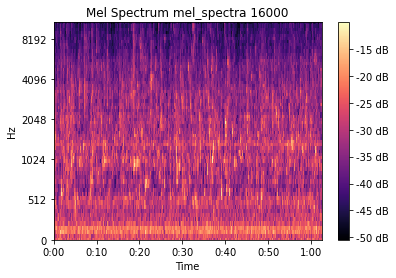

In [87]:
# test reading back
fe_mel_read=feature_extractor_from_file(os.path.abspath(BASE_FOLDER + r'\dataset\MEL_to_Pandas\MEL_v1_64_6dBpump00_abn0_00000000.pkl'), 
                                        BASE_FOLDER)
fe_mel_read.plot()
fe_mel_read.para_dict
# TODO fix the name overwrite !!